In [1]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
#from PIL import Image
import pathlib
import csv
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras



Using TensorFlow backend.


In [331]:
header = 'filename chroma_stft_mean chroma_stft_var rmse_mean rmse_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var'
for i in range(1, 23):
    header += f' MFCC_mean{i} MFCC_var{i}'
header += ' label'
header = header.split()

In [332]:
# defining some essential params.

In [2]:
sr = 22050
n_fft=2048
h=512

In [3]:
#I will make functions that returns the features of the audio file using librosa

In [4]:
def chroma_fn( data,samplerate):
    chroma_stft = librosa.feature.chroma_stft(y=data, sr=samplerate)
    return chroma_stft

def spectralcentroind( data,samplerate ):

    spec_cent=librosa.feature.spectral_centroid(y=data, sr=samplerate)
    return 
def spectral_bandwidth( data ,samplerate):
    spec_bw = librosa.feature.spectral_bandwidth(y=data, sr=samplerate)
    return spec_bw
def spectral_rolloff( data,samplerate):
    rolloff = librosa.feature.spectral_rolloff(y=data, sr=samplerate)
    return rolloff
def rmsefunction(data ):
    rmse = librosa.feature.rms(y=data)
    return rmse 

def zerocrossings( data ):

    zcr=librosa.feature.zero_crossing_rate(y)
    return zcr
def Mel_Frequency_Cepstral_Coefficients(data,n_mfcc, samplerate ):
    mfccs = librosa.feature.mfcc(y=data, n_mfcc=n_mfcc, sr=samplerate)
    return mfccs

In [336]:
# combine all the features data into a csv file to make it easier to use

In [337]:

file = open('datasetnew2.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, Fs = librosa.load(songname, mono=True, duration=30)
        chroma =chroma_fn(y,sr)
        rms_e = rmsefunction(y)
        spec_centroid =librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = spectral_bandwidth(y, sr)
        rolloff =spectral_rolloff(y,sr)
        Zcr =zerocrossings(y)
        MFCC = Mel_Frequency_Cepstral_Coefficients(y,22,sr)
        to_append = f'{filename} {np.mean(chroma)} {np.var(chroma)} {np.mean(rms_e)} {np.var(rms_e)} {np.mean(spec_centroid)} {np.var(spec_centroid)} {np.mean(spec_bw)} {np.var(spec_bw)} {np.mean(rolloff)} {np.var(rolloff)} {np.mean(Zcr)} {np.var(Zcr)}'  
        for e in MFCC:
            to_append += f' {np.mean(e)} {np.var(e)}'
        to_append += f' {g}'
        file = open('datasetnew2.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [338]:
# Analysing the Data in Pandas

In [113]:
d = pd.read_csv('datasetnew2.csv')
d.head()

,filename,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,MFCC_var18,MFCC_mean19,MFCC_var19,MFCC_mean20,MFCC_var20,MFCC_mean21,MFCC_var21,MFCC_mean22,MFCC_var22,label
0,blues.00000.wav,0.349943,0.088760,0.130225,0.002829,1784.420446,129789.689238,2002.650192,85897.037189,3806.485316,...,41.642780,-2.300209,55.095062,1.219929,46.971306,-3.540756,37.955143,-1.142787,31.498217,blues
1,blues.00001.wav,0.340983,0.094981,0.095918,0.002373,1529.835316,375984.023922,2038.617579,213794.462833,3548.820207,...,48.157219,-0.287431,51.128483,0.531573,45.825054,-4.092148,42.772713,-1.240102,45.882000,blues
2,blues.00002.wav,0.363603,0.085287,0.175573,0.002748,1552.481958,156526.317715,1747.165985,76046.707240,3040.514948,...,52.425110,-3.433434,46.624176,-2.226821,30.576178,-4.045824,43.603798,-0.569035,59.251289,blues
3,blues.00003.wav,0.404779,0.094009,0.141191,0.006339,1070.119953,184498.418348,1596.333948,166561.564811,2185.028454,...,37.344990,-0.619690,37.298714,-3.408233,31.976847,-1.501870,34.787014,-0.055392,31.227564,blues
4,blues.00004.wav,0.308590,0.087850,0.091563,0.002304,1835.494603,343350.842007,1748.362448,88466.013315,3580.945013,...,53.583614,-4.409333,62.930351,-11.703781,55.235798,-5.859118,67.459702,-0.717013,61.090462,blues


In [114]:
d.shape

(1000, 58)

In [115]:
#we do processing to get the data ready 

In [116]:
def read_clean(txt_file_name):
    
    # read the txt file 
    open_file = open(txt_file_name, 'r') 
    
    # the txt line by line
    lines = open_file.readlines() 
    
    #append each line to the list after removing "/"
    li=[]
    
    # Strips the newline character 
    for line in lines: 
        li.append(line.split("/", 1))
   
    #remove the first index from each list inside the main list
    for i in range(len(li)):
        li[i].pop(0)

    # appent the value of each list inside li to main list final
    f=[]
    for i in range(len(li)):
        f.append(li[i][0])
    #remove /n from each text in the list final 
    for i in range(len(li)):
        f[i]=f[i].strip('\n')
    return(f)
        
        
 


In [117]:
def dataframe_filter(df,array,column_name):
    v=df.loc[d[column_name].isin(array)]
    return v
    '''this function will take 3 i/p the data frame we want to filter ,
    the column name that the filter will be done based on its values,
    array is the list of values that will use to filter the dataframe'''
    


In [118]:
X_TRAIN=dataframe_filter(d,read_clean('train_random.txt'),"filename")
X_TEST=dataframe_filter(d,read_clean('test_random.txt'),"filename")
X_VALID=dataframe_filter(d,read_clean('valid_random.txt'),"filename")

In [119]:
X_TRAIN_fault=dataframe_filter(d,read_clean('train_fault.txt'),"filename")
X_TEST_fault=dataframe_filter(d,read_clean('test_fault.txt'),"filename")
X_VALID_fault=dataframe_filter(d,read_clean('valid_fault.txt'),"filename")

In [120]:
# cheack for corecctense 

print(X_TRAIN.shape)
print(X_TEST.shape)
print(X_VALID.shape)
print('----------------')
print(X_TRAIN_fault.shape)
print(X_TEST_fault.shape)
print(X_VALID_fault.shape)


(500, 58)
(250, 58)
(250, 58)
----------------
(443, 58)
(290, 58)
(197, 58)


In [121]:
songname=X_TRAIN.pop('filename')
songnameS=X_TEST.pop('filename')
songname_fault=X_TRAIN_fault.pop('filename')
songnameS_fault=X_TEST_fault.pop('filename')
ooo=list(songnameS)
ooo2=list(songnameS_fault)


In [122]:
X_VALID= X_VALID.drop(['filename'],axis=1)
X_VALID_fault= X_VALID_fault.drop(['filename'],axis=1)

In [123]:
#Now I will create the lables 

In [124]:
encoder = LabelEncoder()


genre_listTRAIN = X_TRAIN.iloc[:, -1]
Y_TRAIN = encoder.fit_transform(genre_listTRAIN)

genre_listTEST = X_TEST.iloc[:, -1]
Y_TEST = encoder.fit_transform(genre_listTEST)

genre_listVALID = X_VALID.iloc[:, -1]
Y_VALID = encoder.fit_transform(genre_listVALID)

#labels for the fault filtered partition
genre_listTRAIN_fault = X_TRAIN_fault.iloc[:, -1]
Y_TRAIN_fault = encoder.fit_transform(genre_listTRAIN_fault)

genre_listTEST_fault = X_TEST_fault.iloc[:, -1]
Y_TEST_fault = encoder.fit_transform(genre_listTEST_fault)

genre_listVALID_fault = X_VALID_fault.iloc[:, -1]
Y_VALID_fault = encoder.fit_transform(genre_listVALID_fault)



encoder.inverse_transform(Y_TRAIN)
encoder.inverse_transform(Y_TEST)
encoder.inverse_transform(Y_VALID)

encoder.inverse_transform(Y_TRAIN_fault)
encoder.inverse_transform(Y_TEST_fault)
encoder.inverse_transform(Y_VALID_fault)





array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'classical', 'classical', 'classical',
       'classical', 'classical', 'classical', 'classical', 'classical',
       'classical', 'classical', 'classical', 'classical', 'classical',
       'classical', 'classical', 'classical', 'classical', 'classical',
       'classical', 'classical', 'country', 'country', 'country',
       'country', 'country', 'country', 'country', 'country', 'country',
       'country', 'country', 'country', 'country', 'country', 'country',
       'country', 'country', 'country', 'country', 'country', 'country',
       'country', 'country', 'disco', 'disco', 'disco', 'disco', 'disco',
       'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco',
       'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco',
       'dis

In [125]:
scaler = StandardScaler()
X_TRAIN= scaler.fit_transform(np.array(X_TRAIN.iloc[:, :-1], dtype = float))
X_TEST= scaler.fit_transform(np.array(X_TEST.iloc[:, :-1], dtype = float))
X_VALID= scaler.fit_transform(np.array(X_VALID.iloc[:, :-1], dtype = float))


X_TRAIN_fault= scaler.fit_transform(np.array(X_TRAIN_fault.iloc[:, :-1], dtype = float))
X_TEST_fault= scaler.fit_transform(np.array(X_TEST_fault.iloc[:, :-1], dtype = float))
X_VALID_fault= scaler.fit_transform(np.array(X_VALID_fault.iloc[:, :-1], dtype = float))

# Now I will test the dataset (df) from a machine learning prespective using 2 kinds of classifiers  before getting into the deep learning and then compare them  

In [159]:
g=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
def model_(model, title = "Default"):
    model.fit(X_TRAIN, Y_TRAIN)
    preds = model.predict(X_TEST)
    print(confusion_matrix(Y_TEST, preds))
    print('Accuracy', title, ':', round(accuracy_score(Y_TEST, preds), 5), '\n')
    

In [163]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Naive Bayes classifier
nb = GaussianNB()
model_(nb, "Naive Bayes")


# Support Vector Machine classifier
svm = SVC(decision_function_shape="ovo")
model_(svm, "Support Vector Machine")


[[10  0  1  2  0  2  5  0  3  2]
 [ 0 18  0  0  0  5  0  0  0  2]
 [ 5  0 12  1  0  0  3  2  1  1]
 [ 2  0  1 14  1  0  5  1  0  1]
 [ 0  0  1  7  9  0  4  1  3  0]
 [ 0  6  2  3  0 12  0  0  1  1]
 [ 0  0  0  0  0  0 23  0  0  2]
 [ 0  0  0  2  2  0  0 20  1  0]
 [ 0  0  3  3  1  1  0  0 15  2]
 [ 1  0  5  9  0  0  6  0  1  3]]
Accuracy Naive Bayes : 0.544 

[[18  0  1  0  1  2  2  0  0  1]
 [ 0 20  0  0  0  4  0  0  0  1]
 [ 2  0 16  0  0  1  0  2  0  4]
 [ 1  0  0 18  1  0  1  1  0  3]
 [ 0  0  1  4 13  0  3  1  3  0]
 [ 1  1  0  0  0 22  0  0  1  0]
 [ 0  0  0  0  0  0 22  0  0  3]
 [ 0  0  0  1  2  1  0 20  0  1]
 [ 1  0  4  0  3  0  1  0 15  1]
 [ 2  0  2  7  0  0  1  1  1 11]]
Accuracy Support Vector Machine : 0.7 



# I will build the ANN neural network now. 

In [154]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_TRAIN.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [155]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [156]:
history = model.fit(X_TRAIN,
                   Y_TRAIN,
                    epochs=12,
                    batch_size=64)


Epoch 1/12
500/500 [==============================] - 0s 166us/step - loss: 2.1911 - accuracy: 0.2340
Epoch 2/12
500/500 [==============================] - 0s 32us/step - loss: 1.7476 - accuracy: 0.5100
Epoch 3/12
500/500 [==============================] - 0s 32us/step - loss: 1.4132 - accuracy: 0.5700
Epoch 4/12
500/500 [==============================] - 0s 34us/step - loss: 1.1528 - accuracy: 0.6380
Epoch 5/12
500/500 [==============================] - 0s 30us/step - loss: 0.9887 - accuracy: 0.6720
Epoch 6/12
500/500 [==============================] - 0s 32us/step - loss: 0.8477 - accuracy: 0.7140
Epoch 7/12
500/500 [==============================] - 0s 34us/step - loss: 0.7392 - accuracy: 0.7720
Epoch 8/12
500/500 [==============================] - 0s 32us/step - loss: 0.6454 - accuracy: 0.8080
Epoch 9/12
500/500 [==============================] - 0s 30us/step - loss: 0.5578 - accuracy: 0.8320
Epoch 10/12
500/500 [==============================] - 0s 32us/step - loss: 0.4924 - accur

In [157]:
test_loss, test_acc = model.evaluate(X_TEST,Y_TEST)

250/250 [==============================] - 0s 76us/step


In [158]:
print('test_acc: ',test_acc)

test_acc:  0.7039999961853027


In [133]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()




Train on 500 samples, validate on 250 samples
Epoch 1/10
500/500 [==============================] - 0s 207us/step - loss: 2.1468 - accuracy: 0.2660 - val_loss: 1.8739 - val_accuracy: 0.4360
Epoch 2/10
500/500 [==============================] - 0s 44us/step - loss: 1.6573 - accuracy: 0.4920 - val_loss: 1.5205 - val_accuracy: 0.4840
Epoch 3/10
500/500 [==============================] - 0s 46us/step - loss: 1.3174 - accuracy: 0.5860 - val_loss: 1.2821 - val_accuracy: 0.5480
Epoch 4/10
500/500 [==============================] - 0s 40us/step - loss: 1.0718 - accuracy: 0.6560 - val_loss: 1.1338 - val_accuracy: 0.6080
Epoch 5/10
500/500 [==============================] - 0s 38us/step - loss: 0.8990 - accuracy: 0.7180 - val_loss: 1.0373 - val_accuracy: 0.6320
Epoch 6/10
500/500 [==============================] - 0s 40us/step - loss: 0.7705 - accuracy: 0.7480 - val_loss: 0.9540 - val_accuracy: 0.6480
Epoch 7/10
500/500 [==============================] - 0s 40us/step - loss: 0.6663 - accuracy: 0

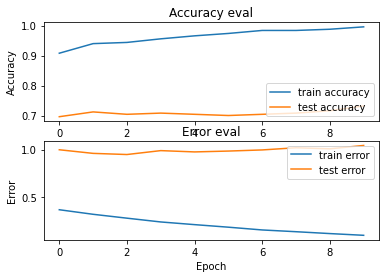

In [134]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_TRAIN.shape[1],)))
#model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


optimiser = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
'''model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''
model.fit(X_TRAIN,Y_TRAIN,epochs=10,batch_size=64,validation_data=(X_VALID, Y_VALID))


results = model.evaluate(X_TEST, Y_TEST)
 # train model
history = model.fit(X_TRAIN, Y_TRAIN,epochs=10,batch_size=64, validation_data=(X_TEST, Y_TEST))

    # plot accuracy and error as a function of the epochs
plot_history(history)

In [135]:
# Predictions on Test Data
predictions = model.predict(X_TEST)

In [136]:
results

[0.9699855937957763, 0.699999988079071]

In [137]:

predictions.shape
np.sum(predictions[3])
g[np.argmax(predictions[2])]
g[Y_TEST[np.argmax(predictions[2])]]
for i in range(len(Y_TEST)):
    print(f"the pred of {ooo[i]} = {g[np.argmax(predictions[i])]}")

the pred of blues.00005.wav = rock
the pred of blues.00010.wav = blues
the pred of blues.00012.wav = blues
the pred of blues.00013.wav = blues
the pred of blues.00015.wav = blues
the pred of blues.00020.wav = jazz
the pred of blues.00023.wav = jazz
the pred of blues.00024.wav = blues
the pred of blues.00025.wav = blues
the pred of blues.00028.wav = blues
the pred of blues.00031.wav = blues
the pred of blues.00040.wav = blues
the pred of blues.00043.wav = blues
the pred of blues.00049.wav = blues
the pred of blues.00052.wav = blues
the pred of blues.00053.wav = blues
the pred of blues.00059.wav = metal
the pred of blues.00062.wav = blues
the pred of blues.00064.wav = metal
the pred of blues.00077.wav = blues
the pred of blues.00083.wav = blues
the pred of blues.00084.wav = blues
the pred of blues.00092.wav = blues
the pred of blues.00095.wav = blues
the pred of blues.00098.wav = metal
the pred of classical.00009.wav = classical
the pred of classical.00016.wav = classical
the pred of cla

# Now i will use the fault partition 

In [164]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_TRAIN_fault.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [167]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_TRAIN_fault,
                   Y_TRAIN_fault,
                    epochs=12,
                    batch_size=32)
test_loss, test_acc = model.evaluate(X_TEST_fault,Y_TEST_fault)
print('test_acc: ',test_acc)

Epoch 1/12
443/443 [==============================] - 0s 230us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2/12
443/443 [==============================] - 0s 61us/step - loss: 0.0116 - accuracy: 0.9955
Epoch 3/12
443/443 [==============================] - 0s 61us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 4/12
443/443 [==============================] - 0s 56us/step - loss: 0.0247 - accuracy: 0.9977
Epoch 5/12
443/443 [==============================] - 0s 56us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 6/12
443/443 [==============================] - 0s 54us/step - loss: 6.9131e-04 - accuracy: 1.0000
Epoch 7/12
443/443 [==============================] - 0s 59us/step - loss: 2.9984e-04 - accuracy: 1.0000
Epoch 8/12
443/443 [==============================] - 0s 54us/step - loss: 2.8610e-04 - accuracy: 1.0000
Epoch 9/12
443/443 [==============================] - 0s 56us/step - loss: 1.9269e-04 - accuracy: 1.0000
Epoch 10/12
443/443 [==============================] - 0s 54us/step - loss

Train on 500 samples, validate on 197 samples
Epoch 1/15
500/500 [==============================] - 0s 308us/step - loss: 1.9121 - accuracy: 0.3000 - val_loss: 1.5569 - val_accuracy: 0.3858
Epoch 2/15
500/500 [==============================] - 0s 120us/step - loss: 1.2321 - accuracy: 0.5420 - val_loss: 1.3065 - val_accuracy: 0.5584
Epoch 3/15
500/500 [==============================] - 0s 112us/step - loss: 0.9337 - accuracy: 0.6700 - val_loss: 1.0006 - val_accuracy: 0.6345
Epoch 4/15
500/500 [==============================] - 0s 109us/step - loss: 0.6648 - accuracy: 0.7780 - val_loss: 0.8957 - val_accuracy: 0.6904
Epoch 5/15
500/500 [==============================] - 0s 114us/step - loss: 0.5409 - accuracy: 0.8040 - val_loss: 0.9072 - val_accuracy: 0.6954
Epoch 6/15
500/500 [==============================] - 0s 112us/step - loss: 0.4172 - accuracy: 0.8560 - val_loss: 0.7734 - val_accuracy: 0.7614
Epoch 7/15
500/500 [==============================] - 0s 112us/step - loss: 0.3847 - accur

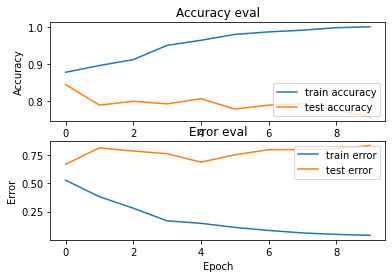

In [169]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_TRAIN_fault.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


optimiser = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
'''model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''
model.fit(X_TRAIN,Y_TRAIN,epochs=15,batch_size=32,validation_data=(X_VALID_fault, Y_VALID_fault))


results = model.evaluate(X_TEST_fault, Y_TEST_fault)
 # train model
history = model.fit(X_TRAIN_fault, Y_TRAIN_fault,epochs=10,batch_size=128, validation_data=(X_TEST_fault, Y_TEST_fault))

    # plot accuracy and error as a function of the epochs
plot_history(history)

In [170]:
# Predictions on Test Data
predictions = model.predict(X_TEST_fault)
results

[0.6536092114859614, 0.8482758402824402]

In [141]:
predictions.shape
np.sum(predictions[3])
g[np.argmax(predictions[2])]
g[Y_TEST[np.argmax(predictions[2])]]
for i in range(len(Y_TEST_fault)):
    print(f"the pred of {ooo2[i]} = {g[np.argmax(predictions[i])]}")

the pred of blues.00012.wav = blues
the pred of blues.00013.wav = blues
the pred of blues.00014.wav = jazz
the pred of blues.00015.wav = blues
the pred of blues.00016.wav = blues
the pred of blues.00017.wav = country
the pred of blues.00018.wav = jazz
the pred of blues.00019.wav = blues
the pred of blues.00020.wav = jazz
the pred of blues.00021.wav = blues
the pred of blues.00022.wav = blues
the pred of blues.00023.wav = jazz
the pred of blues.00024.wav = blues
the pred of blues.00025.wav = jazz
the pred of blues.00026.wav = jazz
the pred of blues.00027.wav = jazz
the pred of blues.00028.wav = blues
the pred of blues.00061.wav = metal
the pred of blues.00062.wav = reggae
the pred of blues.00063.wav = disco
the pred of blues.00064.wav = metal
the pred of blues.00065.wav = disco
the pred of blues.00066.wav = blues
the pred of blues.00067.wav = country
the pred of blues.00068.wav = country
the pred of blues.00069.wav = blues
the pred of blues.00070.wav = reggae
the pred of blues.00071.wav